# Imports and getting column names

In [1]:
import pandas as pd # we are changing num to 0 and 1's cuz we only care if you are going to have a 
import numpy as np # CAD not what type it is. # target, 0, 1
from pandas import read_excel
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import functools
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

K = 13 # the number of features to be selected by each algorithm
# code obtained from https://scikit-learn.org/stable/modules/feature_selection.html## 
f = open("C:\\Users\\jinhan laptop\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\columnNamesUCI.txt", "r")
# f = open("C:\\Users\\61491\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\columnNamesUCI.txt", "r")
file_str = f.read()
f.close()

names = file_str.split("\n")
print(names)

['id', 'ccf', 'age', 'sex', 'painloc', 'painexer', 'relrest', 'pncaden', 'cp', 'trestbps', 'htn', 'chol', 'smoke', 'cigs', 'years', 'fbs', 'dm', 'famhist', 'restecg', 'ekgmo', 'ekgday', 'ekgyr', 'dig', 'prop', 'nitr', 'pro', 'diuretic', 'proto', 'thaldur', 'thaltime', 'met', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd', 'dummy', 'trestbpd', 'exang', 'xhypo', 'oldpeak', 'slope', 'rldv5', 'rldv5e', 'ca', 'restckm', 'exerckm', 'restef', 'restwm', 'exeref', 'exerwm', 'thal', 'thalsev', 'thalpul', 'earlobe', 'cmo', 'cday', 'cyr', 'num', 'lmt', 'ladprox', 'laddist', 'diag', 'cxmain', 'ramus', 'om1', 'om2', 'rcaprox', 'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4', 'lvf', 'cathef', 'junk']


# Choosing the dataset

In [2]:
# fname = "C:\\Users\\jinhan laptop\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\updated_hungarian.xlsx"
fname = "C:\\Users\\jinhan laptop\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\updated_cleveland.data.xlsx"
# fname = "C:\\Users\\61491\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\updated_hungarian.xlsx"
# fname = "C:\\Users\\61491\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\updated_cleveland.data.xlsx"
dataframe = read_excel(fname, header = None, names=names)
print(dataframe)
print(dataframe.num)

      id  ccf  age  sex  painloc  painexer  relrest  pncaden  cp  trestbps  \
0      1    0   63    1       -9        -9       -9       -9   1       145   
1      2    0   67    1       -9        -9       -9       -9   4       160   
2      3    0   67    1       -9        -9       -9       -9   4       120   
3      4    0   37    1       -9        -9       -9       -9   3       130   
4      6    0   41    0       -9        -9       -9       -9   2       130   
5      7    0   56    1       -9        -9       -9       -9   2       120   
6      8    0   62    0       -9        -9       -9       -9   4       140   
7      9    0   57    0       -9        -9       -9       -9   4       120   
8     10    0   63    1       -9        -9       -9       -9   4       130   
9     11    0   53    1       -9        -9       -9       -9   4       140   
10    12    0   57    1       -9        -9       -9       -9   4       140   
11    13    0   56    0       -9        -9       -9       -9   2

# Change missing values to NaN

In [3]:
for i in range(dataframe.shape[0]): # for each row
    for column in dataframe.columns:
        if dataframe.at[i, column] == -9:
            dataframe.loc[i, column] = np.nan
print(dataframe)

      id  ccf  age  sex  painloc  painexer  relrest  pncaden  cp  trestbps  \
0      1    0   63    1      NaN       NaN      NaN      NaN   1       145   
1      2    0   67    1      NaN       NaN      NaN      NaN   4       160   
2      3    0   67    1      NaN       NaN      NaN      NaN   4       120   
3      4    0   37    1      NaN       NaN      NaN      NaN   3       130   
4      6    0   41    0      NaN       NaN      NaN      NaN   2       130   
5      7    0   56    1      NaN       NaN      NaN      NaN   2       120   
6      8    0   62    0      NaN       NaN      NaN      NaN   4       140   
7      9    0   57    0      NaN       NaN      NaN      NaN   4       120   
8     10    0   63    1      NaN       NaN      NaN      NaN   4       130   
9     11    0   53    1      NaN       NaN      NaN      NaN   4       140   
10    12    0   57    1      NaN       NaN      NaN      NaN   4       140   
11    13    0   56    0      NaN       NaN      NaN      NaN   2

# Change NaN to mean of column.

In [4]:
df = dataframe.fillna(dataframe.mean())
print(df)
print(df.num) # target

      id  ccf  age  sex  painloc  painexer  relrest  pncaden  cp  trestbps  \
0      1    0   63    1      NaN       NaN      NaN      NaN   1       145   
1      2    0   67    1      NaN       NaN      NaN      NaN   4       160   
2      3    0   67    1      NaN       NaN      NaN      NaN   4       120   
3      4    0   37    1      NaN       NaN      NaN      NaN   3       130   
4      6    0   41    0      NaN       NaN      NaN      NaN   2       130   
5      7    0   56    1      NaN       NaN      NaN      NaN   2       120   
6      8    0   62    0      NaN       NaN      NaN      NaN   4       140   
7      9    0   57    0      NaN       NaN      NaN      NaN   4       120   
8     10    0   63    1      NaN       NaN      NaN      NaN   4       130   
9     11    0   53    1      NaN       NaN      NaN      NaN   4       140   
10    12    0   57    1      NaN       NaN      NaN      NaN   4       140   
11    13    0   56    0      NaN       NaN      NaN      NaN   2

# Drop columns of only NaN values.

In [5]:
# print(df.isna())
# print(df.num.isna())
# print
df = df.dropna(axis=1,how='all')
print(df)
print(df.num)

      id  ccf  age  sex  cp  trestbps  htn  chol       cigs      years ...   \
0      1    0   63    1   1       145    1   233  50.000000  20.000000 ...    
1      2    0   67    1   4       160    1   286  40.000000  40.000000 ...    
2      3    0   67    1   4       120    1   229  20.000000  35.000000 ...    
3      4    0   37    1   3       130    0   250   0.000000   0.000000 ...    
4      6    0   41    0   2       130    1   204   0.000000   0.000000 ...    
5      7    0   56    1   2       120    1   236  20.000000  20.000000 ...    
6      8    0   62    0   4       140    0   268   0.000000   0.000000 ...    
7      9    0   57    0   4       120    1   354   0.000000   0.000000 ...    
8     10    0   63    1   4       130    1   254   0.000000   0.000000 ...    
9     11    0   53    1   4       140    0   203  20.000000  25.000000 ...    
10    12    0   57    1   4       140    0   192  75.000000  25.000000 ...    
11    13    0   56    0   2       140    0   294   0

# Drop repeated column (TRESTBPS same as DUMMY) and irrelevant columns.
## https://www.sciencedirect.com/science/article/pii/S2352914820300125
## This is to avoid overfitting

In [6]:
print(df.dummy)
print(df.trestbps)
# df = df.drop(['dummy'], axis=1)
df = df.drop(['dummy', 'id', 'ekgyr', 'ekgday', 'ekgmo', 'ccf', 'cmo', 'cday', 'cyr'], axis=1)
print(df)

0      145
1      160
2      120
3      130
4      130
5      120
6      140
7      120
8      130
9      140
10     140
11     140
12     130
13     120
14     172
15     150
16     110
17     140
18     130
19     130
20     110
21     150
22     120
23     132
24     130
25     120
26     120
27     150
28     150
29     110
      ... 
252    128
253    120
254    115
255    120
256    106
257    140
258    156
259    124
260    118
261    136
262    150
263    120
264    138
265    136
266    128
267    126
268    152
269    130
270    140
271    160
272    140
273    112
274    134
275    170
276    146
277    138
278    154
279    130
280    110
281    130
Name: dummy, Length: 282, dtype: int64
0      145
1      160
2      120
3      130
4      130
5      120
6      140
7      120
8      130
9      140
10     140
11     140
12     130
13     120
14     172
15     150
16     110
17     140
18     130
19     130
20     110
21     150
22     120
23     132
24     130
25     120
26  

# Removed columns with low variance in values

In [7]:
myGenderColumn = df["sex"]
myExangColumn = df["exang"]
myFBSColumn = df["fbs"]
print(myGenderColumn)

0      1
1      1
2      1
3      1
4      0
5      1
6      0
7      0
8      1
9      1
10     1
11     0
12     1
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     1
21     0
22     1
23     1
24     1
25     0
26     0
27     0
28     1
29     1
      ..
252    1
253    0
254    1
255    0
256    0
257    0
258    1
259    1
260    0
261    0
262    0
263    1
264    1
265    1
266    1
267    1
268    1
269    1
270    1
271    1
272    1
273    0
274    1
275    1
276    0
277    0
278    1
279    0
280    1
281    1
Name: sex, Length: 282, dtype: int64


In [8]:

def variance_threshold_selector(data):
    selector = VarianceThreshold(0.225) # 0.225 chosen to remove some fields that do not have much variance.
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]] # code from stackoverflow
# x = df.values
df = variance_threshold_selector(df)
df = df.join(myGenderColumn)
df = df.join(myExangColumn)
df = df.join(myFBSColumn)
print(myGenderColumn)
# varianceThresholdSelected = sel.fit_transform(x)
# df = pd.DataFrame(varianceThresholdSelected, columns = df.columns)
print(df)
print(df.sex)

0      1
1      1
2      1
3      1
4      0
5      1
6      0
7      0
8      1
9      1
10     1
11     0
12     1
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     1
21     0
22     1
23     1
24     1
25     0
26     0
27     0
28     1
29     1
      ..
252    1
253    0
254    1
255    0
256    0
257    0
258    1
259    1
260    0
261    0
262    0
263    1
264    1
265    1
266    1
267    1
268    1
269    1
270    1
271    1
272    1
273    0
274    1
275    1
276    0
277    0
278    1
279    0
280    1
281    1
Name: sex, Length: 282, dtype: int64
     age  cp  trestbps  htn  chol       cigs      years  famhist  restecg  \
0     63   1       145    1   233  50.000000  20.000000        1        2   
1     67   4       160    1   286  40.000000  40.000000        1        2   
2     67   4       120    1   229  20.000000  35.000000        1        2   
3     37   3       130    0   250   0.000000   0.000000        1        0   
4     41   2       130    1  

# Normalize data

In [9]:

# normalize data
x = df.values #returns a numpy array
# columns = df.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = df.columns)
print(df)
print(df.num)


          age        cp  trestbps  htn      chol      cigs     years  famhist  \
0    0.708333  0.000000  0.481132  1.0  0.244292  0.505051  0.370370      1.0   
1    0.791667  1.000000  0.622642  1.0  0.365297  0.404040  0.740741      1.0   
2    0.791667  1.000000  0.245283  1.0  0.235160  0.202020  0.648148      1.0   
3    0.166667  0.666667  0.339623  0.0  0.283105  0.000000  0.000000      1.0   
4    0.250000  0.333333  0.339623  1.0  0.178082  0.000000  0.000000      1.0   
5    0.562500  0.333333  0.245283  1.0  0.251142  0.202020  0.370370      1.0   
6    0.687500  1.000000  0.433962  0.0  0.324201  0.000000  0.000000      1.0   
7    0.583333  1.000000  0.245283  1.0  0.520548  0.000000  0.000000      1.0   
8    0.708333  1.000000  0.339623  1.0  0.292237  0.000000  0.000000      0.0   
9    0.500000  1.000000  0.433962  0.0  0.175799  0.202020  0.462963      1.0   
10   0.583333  1.000000  0.433962  0.0  0.150685  0.757576  0.462963      0.0   
11   0.562500  0.333333  0.4

In [10]:
# df_vals = dataframe.values
df_no_target = df[df.columns.difference(["num"])]
print(df_no_target) # setting target and non target
df_vals = df_no_target.values
print(df.num.values)
# target_vals = df.num.values

          age        ca      chol      cigs        cp  exang  famhist  fbs  \
0    0.708333  0.000000  0.244292  0.505051  0.000000    0.0      1.0  1.0   
1    0.791667  1.000000  0.365297  0.404040  1.000000    1.0      1.0  0.0   
2    0.791667  0.666667  0.235160  0.202020  1.000000    1.0      1.0  0.0   
3    0.166667  0.000000  0.283105  0.000000  0.666667    0.0      1.0  0.0   
4    0.250000  0.000000  0.178082  0.000000  0.333333    0.0      1.0  0.0   
5    0.562500  0.000000  0.251142  0.202020  0.333333    0.0      1.0  0.0   
6    0.687500  0.666667  0.324201  0.000000  1.000000    0.0      1.0  0.0   
7    0.583333  0.000000  0.520548  0.000000  1.000000    1.0      1.0  0.0   
8    0.708333  0.333333  0.292237  0.000000  1.000000    0.0      0.0  0.0   
9    0.500000  0.000000  0.175799  0.202020  1.000000    1.0      1.0  1.0   
10   0.583333  0.000000  0.150685  0.757576  1.000000    0.0      0.0  0.0   
11   0.562500  0.000000  0.383562  0.000000  0.333333    0.0    

# Reformat target columns

In [11]:
#print(df.shape[0])
# for i in range(len(df.shape[0])):
# print(df.num)
# print(df)
df.loc[df["num"] > 0, "num"] = 1 # CHANGE 1,2,3 to 1, make it a classification problem
print(df.num) 
target_vals = df.num.values

0      0.0
1      1.0
2      1.0
3      0.0
4      0.0
5      0.0
6      1.0
7      0.0
8      1.0
9      1.0
10     0.0
11     0.0
12     1.0
13     0.0
14     0.0
15     0.0
16     1.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     1.0
23     1.0
24     1.0
25     0.0
26     0.0
27     0.0
28     0.0
29     1.0
      ... 
252    0.0
253    0.0
254    0.0
255    0.0
256    0.0
257    0.0
258    0.0
259    1.0
260    0.0
261    1.0
262    0.0
263    0.0
264    1.0
265    1.0
266    1.0
267    1.0
268    1.0
269    0.0
270    1.0
271    0.0
272    1.0
273    0.0
274    1.0
275    0.0
276    0.0
277    0.0
278    1.0
279    0.0
280    1.0
281    0.0
Name: num, Length: 282, dtype: float64


# Feature selection

In [12]:
selector = SelectKBest(f_classif, k = K) #chi2, ...  # use some other algorithms to find the most informative features. best first search 
selector.fit_transform(df_no_target, target_vals)
features = selector.get_support(indices = True)
print(features)
for x in features:
    print(x)
print(df_no_target.columns[features])
features = [column for column in df_no_target.columns[features]]
selector.columns = features

print(df_no_target[selector.columns])

print(selector.columns)

F_classif = selector.columns
#     #Select Model
#     selector = VarianceThreshold(0) #Defaults to 0.0, e.g. only remove features with the same value in all samples

#     #Fit the Model
#     selector.fit(data)
#     features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
#     features = [column for column in data[features]] #Array of all nonremoved features' names

#     #Format and Return
#     selector = pd.DataFrame(selector.transform(data))
#     selector.columns = features
# print(df_no_target)

[ 0  1  4  5 10 11 12 13 15 16 17 18 19]
0
1
4
5
10
11
12
13
15
16
17
18
19
Index(['age', 'ca', 'cp', 'exang', 'lvx4', 'met', 'oldpeak', 'restecg', 'sex',
       'slope', 'thal', 'thalach', 'thaldur'],
      dtype='object')
          age        ca        cp  exang      lvx4       met   oldpeak  \
0    0.708333  0.000000  0.000000    0.0  0.000000  0.666667  0.370968   
1    0.791667  1.000000  1.000000    1.0  0.000000  0.666667  0.241935   
2    0.791667  0.666667  1.000000    1.0  0.857143  0.466667  0.419355   
3    0.166667  0.000000  0.666667    0.0  0.000000  0.933333  0.564516   
4    0.250000  0.000000  0.333333    0.0  0.000000  0.400000  0.225806   
5    0.562500  0.000000  0.333333    0.0  0.000000  0.866667  0.129032   
6    0.687500  0.666667  1.000000    0.0  0.857143  0.266667  0.580645   
7    0.583333  0.000000  1.000000    1.0  0.000000  0.466667  0.096774   
8    0.708333  0.333333  1.000000    0.0  0.857143  0.400000  0.225806   
9    0.500000  0.000000  1.000000   

In [13]:
# selector = SelectKBest(f_regression, k = 14)
selector = SelectKBest(mutual_info_regression, k = K)#chi2, ...  # use some other algorithms to find the most informative features. best first search 
selector.fit_transform(df_no_target, target_vals)
features = selector.get_support(indices = True)
print(features)
for x in features:
    print(x)
print(df_no_target.columns[features])
features = [column for column in df_no_target.columns[features]]
selector.columns = features

print(df_no_target[selector.columns])

print(selector.columns)

Mutual_info_regression = selector.columns
#     #Select Model
#     selector = VarianceThreshold(0) #Defaults to 0.0, e.g. only remove features with the same value in all samples

#     #Fit the Model
#     selector.fit(data)
#     features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
#     features = [column for column in data[features]] #Array of all nonremoved features' names

#     #Format and Return
#     selector = pd.DataFrame(selector.transform(data))
#     selector.columns = features
# print(df_no_target)

[ 1  2  4  5  6  9 11 12 15 16 17 18 19]
1
2
4
5
6
9
11
12
15
16
17
18
19
Index(['ca', 'chol', 'cp', 'exang', 'famhist', 'lvx3', 'met', 'oldpeak', 'sex',
       'slope', 'thal', 'thalach', 'thaldur'],
      dtype='object')
           ca      chol        cp  exang  famhist      lvx3       met  \
0    0.000000  0.244292  0.000000    0.0      1.0  0.000000  0.666667   
1    1.000000  0.365297  1.000000    1.0      1.0  0.000000  0.666667   
2    0.666667  0.235160  1.000000    1.0      1.0  0.000000  0.466667   
3    0.000000  0.283105  0.666667    0.0      1.0  0.000000  0.933333   
4    0.000000  0.178082  0.333333    0.0      1.0  0.000000  0.400000   
5    0.000000  0.251142  0.333333    0.0      1.0  0.000000  0.866667   
6    0.666667  0.324201  1.000000    0.0      1.0  0.000000  0.266667   
7    0.000000  0.520548  1.000000    1.0      1.0  0.000000  0.466667   
8    0.333333  0.292237  1.000000    0.0      0.0  0.714286  0.400000   
9    0.000000  0.175799  1.000000    1.0      1

In [14]:
selector = SelectKBest(f_regression, k = K)
# selector = SelectKBest(mutual_info_regression, k = 14)#chi2, ...  # use some other algorithms to find the most informative features. best first search 
selector.fit_transform(df_no_target, target_vals)
features = selector.get_support(indices = True)
print(features)
for x in features:
    print(x)
print(df_no_target.columns[features])
features = [column for column in df_no_target.columns[features]]
selector.columns = features

print(df_no_target[selector.columns])

print(selector.columns)
F_regression = selector.columns
#     #Select Model
#     selector = VarianceThreshold(0) #Defaults to 0.0, e.g. only remove features with the same value in all samples

#     #Fit the Model
#     selector.fit(data)
#     features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
#     features = [column for column in data[features]] #Array of all nonremoved features' names

#     #Format and Return
#     selector = pd.DataFrame(selector.transform(data))
#     selector.columns = features
# print(df_no_target)

[ 0  1  4  5 10 11 12 13 15 16 17 18 19]
0
1
4
5
10
11
12
13
15
16
17
18
19
Index(['age', 'ca', 'cp', 'exang', 'lvx4', 'met', 'oldpeak', 'restecg', 'sex',
       'slope', 'thal', 'thalach', 'thaldur'],
      dtype='object')
          age        ca        cp  exang      lvx4       met   oldpeak  \
0    0.708333  0.000000  0.000000    0.0  0.000000  0.666667  0.370968   
1    0.791667  1.000000  1.000000    1.0  0.000000  0.666667  0.241935   
2    0.791667  0.666667  1.000000    1.0  0.857143  0.466667  0.419355   
3    0.166667  0.000000  0.666667    0.0  0.000000  0.933333  0.564516   
4    0.250000  0.000000  0.333333    0.0  0.000000  0.400000  0.225806   
5    0.562500  0.000000  0.333333    0.0  0.000000  0.866667  0.129032   
6    0.687500  0.666667  1.000000    0.0  0.857143  0.266667  0.580645   
7    0.583333  0.000000  1.000000    1.0  0.000000  0.466667  0.096774   
8    0.708333  0.333333  1.000000    0.0  0.857143  0.400000  0.225806   
9    0.500000  0.000000  1.000000   

In [15]:
selector = SelectKBest(chi2, k = K)
# selector = SelectKBest(mutual_info_regression, k = 14)#chi2, ...  # use some other algorithms to find the most informative features. best first search 
selector.fit_transform(df_no_target, target_vals)
features = selector.get_support(indices = True)
print(features)
for x in features:
    print(x)
print(df_no_target.columns[features])
features = [column for column in df_no_target.columns[features]]
selector.columns = features

print(df_no_target[selector.columns])

print(selector.columns)
Chi2 = selector.columns
#     #Select Model
#     selector = VarianceThreshold(0) #Defaults to 0.0, e.g. only remove features with the same value in all samples

#     #Fit the Model
#     selector.fit(data)
#     features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
#     features = [column for column in data[features]] #Array of all nonremoved features' names

#     #Format and Return
#     selector = pd.DataFrame(selector.transform(data))
#     selector.columns = features
# print(df_no_target)

[ 1  4  5  9 10 11 12 13 15 16 17 18 19]
1
4
5
9
10
11
12
13
15
16
17
18
19
Index(['ca', 'cp', 'exang', 'lvx3', 'lvx4', 'met', 'oldpeak', 'restecg', 'sex',
       'slope', 'thal', 'thalach', 'thaldur'],
      dtype='object')
           ca        cp  exang      lvx3      lvx4       met   oldpeak  \
0    0.000000  0.000000    0.0  0.000000  0.000000  0.666667  0.370968   
1    1.000000  1.000000    1.0  0.000000  0.000000  0.666667  0.241935   
2    0.666667  1.000000    1.0  0.000000  0.857143  0.466667  0.419355   
3    0.000000  0.666667    0.0  0.000000  0.000000  0.933333  0.564516   
4    0.000000  0.333333    0.0  0.000000  0.000000  0.400000  0.225806   
5    0.000000  0.333333    0.0  0.000000  0.000000  0.866667  0.129032   
6    0.666667  1.000000    0.0  0.000000  0.857143  0.266667  0.580645   
7    0.000000  1.000000    1.0  0.000000  0.000000  0.466667  0.096774   
8    0.333333  1.000000    0.0  0.714286  0.857143  0.400000  0.225806   
9    0.000000  1.000000    1.0  0.0

In [16]:
selector = SelectKBest(mutual_info_classif, k = K)
# selector = SelectKBest(mutual_info_regression, k = 14)#chi2, ...  # use some other algorithms to find the most informative features. best first search 
selector.fit_transform(df_no_target, target_vals)
features = selector.get_support(indices = True)
print(features)
for x in features:
    print(x)
print(df_no_target.columns[features])
features = [column for column in df_no_target.columns[features]]
selector.columns = features

print(df_no_target[selector.columns])

print(selector.columns)
Mutual_info_classif = selector.columns
#     #Select Model
#     selector = VarianceThreshold(0) #Defaults to 0.0, e.g. only remove features with the same value in all samples

#     #Fit the Model
#     selector.fit(data)
#     features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
#     features = [column for column in data[features]] #Array of all nonremoved features' names

#     #Format and Return
#     selector = pd.DataFrame(selector.transform(data))
#     selector.columns = features
# print(df_no_target)

[ 1  2  4  5 10 12 15 16 17 18 19 21 26]
1
2
4
5
10
12
15
16
17
18
19
21
26
Index(['ca', 'chol', 'cp', 'exang', 'lvx4', 'oldpeak', 'sex', 'slope', 'thal',
       'thalach', 'thaldur', 'thaltime', 'years'],
      dtype='object')
           ca      chol        cp  exang      lvx4   oldpeak  sex  slope  \
0    0.000000  0.244292  0.000000    0.0  0.000000  0.370968  1.0    1.0   
1    1.000000  0.365297  1.000000    1.0  0.000000  0.241935  1.0    0.5   
2    0.666667  0.235160  1.000000    1.0  0.857143  0.419355  1.0    0.5   
3    0.000000  0.283105  0.666667    0.0  0.000000  0.564516  1.0    1.0   
4    0.000000  0.178082  0.333333    0.0  0.000000  0.225806  0.0    0.0   
5    0.000000  0.251142  0.333333    0.0  0.000000  0.129032  1.0    0.0   
6    0.666667  0.324201  1.000000    0.0  0.857143  0.580645  0.0    1.0   
7    0.000000  0.520548  1.000000    1.0  0.000000  0.096774  0.0    0.0   
8    0.333333  0.292237  1.000000    0.0  0.857143  0.225806  1.0    0.5   
9    0.00000

[282 rows x 13 columns]
['ca', 'chol', 'cp', 'exang', 'lvx4', 'oldpeak', 'sex', 'slope', 'thal', 'thalach', 'thaldur', 'thaltime', 'years']


In [17]:
# F_classif = ['cp', 'exang', 'laddist', 'ladprox', 'lvf', 'lvx4', 'nitr', 'oldpeak', 'painexer', 'relrest', 'sex', 'slope', 'thalach', 'thalsev']

# Mutual_info_regression = ['cp', 'cxmain', 'exang', 'laddist', 'ladprox', 'lvx4', 'oldpeak', 'om1', 'painexer', 'rcadist', 'rcaprox', 'relrest', 'slope', 'thaltime']

# F_regression = ['cp', 'exang', 'laddist', 'ladprox', 'lvf', 'lvx4', 'nitr', 'oldpeak', 'painexer', 'relrest', 'sex', 'slope', 'thalach', 'thalsev']

# Chi2 = ['cp', 'exang', 'fbs', 'lvf', 'lvx3', 'lvx4', 'nitr', 'oldpeak', 'painexer', 'pro', 'prop', 'relrest', 'sex', 'thalach']

# Mutual_info_classif = ['cp', 'cxmain', 'exang', 'laddist', 'ladprox', 'oldpeak', 'om1', 'painexer', 'rcadist', 'rcaprox', 'relrest', 'slope', 'thalach', 'thaltime']

In [18]:
features_selected = F_classif + Mutual_info_regression + F_regression + Chi2 + Mutual_info_classif
print(features_selected)

['age', 'ca', 'cp', 'exang', 'lvx4', 'met', 'oldpeak', 'restecg', 'sex', 'slope', 'thal', 'thalach', 'thaldur', 'ca', 'chol', 'cp', 'exang', 'famhist', 'lvx3', 'met', 'oldpeak', 'sex', 'slope', 'thal', 'thalach', 'thaldur', 'age', 'ca', 'cp', 'exang', 'lvx4', 'met', 'oldpeak', 'restecg', 'sex', 'slope', 'thal', 'thalach', 'thaldur', 'ca', 'cp', 'exang', 'lvx3', 'lvx4', 'met', 'oldpeak', 'restecg', 'sex', 'slope', 'thal', 'thalach', 'thaldur', 'ca', 'chol', 'cp', 'exang', 'lvx4', 'oldpeak', 'sex', 'slope', 'thal', 'thalach', 'thaldur', 'thaltime', 'years']


In [19]:
features_selected.sort()
print(features_selected)
features_dict = {}
for feature in features_selected:
    if not feature in features_dict:
        features_dict[feature] = features_selected.count(feature)
        
print(features_dict)

['age', 'age', 'ca', 'ca', 'ca', 'ca', 'ca', 'chol', 'chol', 'cp', 'cp', 'cp', 'cp', 'cp', 'exang', 'exang', 'exang', 'exang', 'exang', 'famhist', 'lvx3', 'lvx3', 'lvx4', 'lvx4', 'lvx4', 'lvx4', 'met', 'met', 'met', 'met', 'oldpeak', 'oldpeak', 'oldpeak', 'oldpeak', 'oldpeak', 'restecg', 'restecg', 'restecg', 'sex', 'sex', 'sex', 'sex', 'sex', 'slope', 'slope', 'slope', 'slope', 'slope', 'thal', 'thal', 'thal', 'thal', 'thal', 'thalach', 'thalach', 'thalach', 'thalach', 'thalach', 'thaldur', 'thaldur', 'thaldur', 'thaldur', 'thaldur', 'thaltime', 'years']
{'age': 2, 'ca': 5, 'chol': 2, 'cp': 5, 'exang': 5, 'famhist': 1, 'lvx3': 2, 'lvx4': 4, 'met': 4, 'oldpeak': 5, 'restecg': 3, 'sex': 5, 'slope': 5, 'thal': 5, 'thalach': 5, 'thaldur': 5, 'thaltime': 1, 'years': 1}


# Features commonly selected between the different algorithms:
## lvx1 lvx2 lvx3 lvx4 are unknown attributes (https://archive.ics.uci.edu/ml/datasets/Heart+Disease), maybe not use them.

In [20]:
sorted_features = sorted(features_dict.items(), key=lambda x: x[1], reverse=True) # age only appears as top 19, sex much earlier, chol appears at top 17 but only selected by 1 algo.
print(sorted_features) # num represents the times the feature got selected by the feature selection algorithm

[('ca', 5), ('cp', 5), ('exang', 5), ('oldpeak', 5), ('sex', 5), ('slope', 5), ('thal', 5), ('thalach', 5), ('thaldur', 5), ('lvx4', 4), ('met', 4), ('restecg', 3), ('age', 2), ('chol', 2), ('lvx3', 2), ('famhist', 1), ('thaltime', 1), ('years', 1)]


Do not use lvx4 and lvx3 and htn cause they are not explained. met also doesn't make much sense and thaltime too

In [21]:
# features_to_use = ['ca', 'exang', 'cp', 'sex', 'slope', 'thal', 'oldpeak', 'thalach', 'thaldur', 'age', 'chol', 'restecg', 'trestbps', 'years']
# features_to_use = ['ca', 'exang', 'cp', 'sex', 'slope', 'thal', 'oldpeak', 'thalach', 'thaldur', 'age', 'chol', 'restecg', 'trestbps', 'years', 'fbs']
features_to_use = ['ca', 'exang', 'cp', 'sex', 'slope', 'thal', 'oldpeak', 'thalach', 'thaldur', 'age', 'chol', 'restecg']
print(features_to_use)
print(len(features_to_use))

['ca', 'exang', 'cp', 'sex', 'slope', 'thal', 'oldpeak', 'thalach', 'thaldur', 'age', 'chol', 'restecg']
12


In [22]:
features_to_use = []
for feature in sorted_features:
    if feature[1] >= 2:
        if feature[0] != 'lvx4'and feature[0] != 'lvx3' and feature[0] != 'htn' and feature[0] != 'thaltime' and feature[0] != 'met':
            features_to_use.append(feature[0])
print(features_to_use)
print(len(features_to_use))


['ca', 'cp', 'exang', 'oldpeak', 'sex', 'slope', 'thal', 'thalach', 'thaldur', 'restecg', 'age', 'chol']
12


In [23]:
df_to_use = df[features_to_use]
print(df_to_use)

           ca        cp  exang   oldpeak  sex  slope      thal   thalach  \
0    0.000000  0.000000    0.0  0.370968  1.0    1.0  0.750000  0.603053   
1    1.000000  1.000000    1.0  0.241935  1.0    0.5  0.000000  0.282443   
2    0.666667  1.000000    1.0  0.419355  1.0    0.5  1.000000  0.442748   
3    0.000000  0.666667    0.0  0.564516  1.0    1.0  0.000000  0.885496   
4    0.000000  0.333333    0.0  0.225806  0.0    0.0  0.000000  0.770992   
5    0.000000  0.333333    0.0  0.129032  1.0    0.0  0.000000  0.816794   
6    0.666667  1.000000    0.0  0.580645  0.0    1.0  0.000000  0.679389   
7    0.000000  1.000000    1.0  0.096774  0.0    0.0  0.000000  0.702290   
8    0.333333  1.000000    0.0  0.225806  1.0    0.5  1.000000  0.580153   
9    0.000000  1.000000    1.0  0.500000  1.0    1.0  1.000000  0.641221   
10   0.000000  1.000000    0.0  0.064516  1.0    0.5  0.750000  0.587786   
11   0.000000  0.333333    0.0  0.209677  0.0    0.5  0.000000  0.625954   
12   0.33333

# K-Fold Cross Validation Splitting
## 10-fold. Code obtained from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html 
## and https://financetrain.com/k-fold-cross-validation-example-python-scikit-learn/   :)


In [24]:
num_folds = 10
kf = KFold(n_splits = num_folds) # defining 10 folds

In [25]:
kf.get_n_splits(df_to_use)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


# Defining classifier to use


In [26]:
# intermediate_df = pd.DataFrame({"SVM": [np.nan], "LDA": [np.nan], "KNN": [np.nan]})
# print(intermediate_df)
# print(intermediate_df.SVM.size)
intermediate_dict = {"SVM": [], "LDA": [], "KNN": []}

In [27]:

def k_fold_classifier_acc_tester(clf, my_dict, nameOfColumn, df, df_target):
    accuracy_model = []
    for train_index, test_index in kf.split(df, df_target):
#     print("TRAIN:", train_index, "TEST:", test_index)
    # split train-test
        X_train , X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #train the model
        model = clf.fit(X_train, y_train)
        #Append to accuracy_model the accuracy of the model
        accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
        my_dict[nameOfColumn].extend(model.predict(X_test))
    
    return accuracy_model
#     print(accuracy_model)
    

In [28]:
# def hello():
#     print(df_to_use)

# hello()


## SVM

In [29]:
X = df_to_use
y = df.num
svm_accuracy_model = []
svm_clf = SVC(kernel = 'rbf', gamma = 'auto') # classifer

In [30]:
svm_accuracy_model = k_fold_classifier_acc_tester(svm_clf, intermediate_dict, "SVM", df_to_use, df.num)
print(svm_accuracy_model)

[86.20689655172413, 82.75862068965517, 85.71428571428571, 96.42857142857143, 82.14285714285714, 85.71428571428571, 71.42857142857143, 78.57142857142857, 82.14285714285714, 78.57142857142857]


In [31]:
print(intermediate_dict)

{'SVM': [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0

In [32]:
# # clf = tree.DecisioTreeClassifier(random_state =20)
# for train_index, test_index in kf.split(df_to_use, df.num):
# #     print("TRAIN:", train_index, "TEST:", test_index)
#     # split train-test
#     X_train , X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     #train the model
#     model = clf.fit(X_train, y_train)
#     #Append to accuracy_model the accuracy of the model
#     accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
    
# print(accuracy_model)

## Visualise accuracy of each iteration

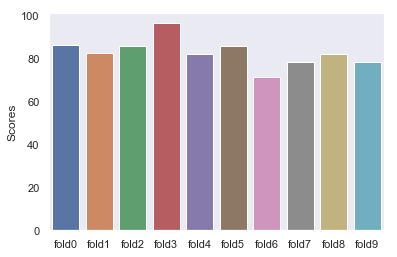

In [33]:
list_of_fold_names = ["fold" + str(i) for i in range(num_folds)]

scores = pd.DataFrame(svm_accuracy_model, columns = ['Scores'])
sns.set(style="dark", rc={"lines.linewidth": 2})
sns.barplot(x=list_of_fold_names, y = "Scores", data=scores)
plt.show()
sns.set()

## Get averaage accuracy

In [34]:
svm_accuracy_summed = functools.reduce(lambda a,b: a + b, svm_accuracy_model)
print(svm_accuracy_summed)
svm_average_acc = svm_accuracy_summed/num_folds
print(svm_average_acc)

829.679802955665
82.96798029556649


## LDA - Linear Discriminant Analysis

In [35]:
lda_accuracy_model = []
lda_clf = LinearDiscriminantAnalysis() # classifer

In [36]:
lda_accuracy_model = k_fold_classifier_acc_tester(lda_clf, intermediate_dict, "LDA", df_to_use, df.num)
print(lda_accuracy_model)

[93.10344827586206, 86.20689655172413, 85.71428571428571, 96.42857142857143, 85.71428571428571, 82.14285714285714, 75.0, 82.14285714285714, 85.71428571428571, 78.57142857142857]


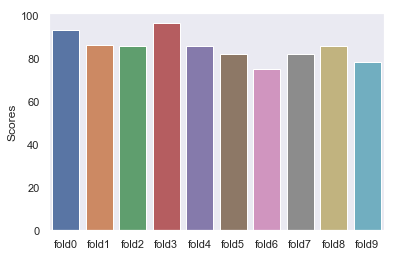

In [37]:
list_of_fold_names = ["fold" + str(i) for i in range(num_folds)]

scores = pd.DataFrame(lda_accuracy_model, columns = ['Scores'])
sns.set(style="dark", rc={"lines.linewidth": 2})
sns.barplot(x=list_of_fold_names, y = "Scores", data=scores)
plt.show()
sns.set()

In [38]:
print(intermediate_dict)

{'SVM': [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0

In [39]:
lda_accuracy_summed = functools.reduce(lambda a,b: a + b, lda_accuracy_model)
print(lda_accuracy_summed)
lda_average_acc = lda_accuracy_summed/num_folds
print(lda_average_acc)

850.7389162561575
85.07389162561574


## KNN

In [40]:
average_accuracies_KNN = [] # to determine which K value to use
num_of_neighbors_to_try_to = 10
for i in range(1, num_of_neighbors_to_try_to + 1):
    accuracy_model = []
    clf = KNeighborsClassifier(n_neighbors = i) # classifer
#     accuracy
    accuracy_model = k_fold_classifier_acc_tester(clf, {'KNN': []}, "KNN", df_to_use, df.num)
    accuracy_summed = functools.reduce(lambda a,b: a + b, accuracy_model)
#     print(accuracy_summed)
    average_acc = accuracy_summed/num_folds
    average_accuracies_KNN.append(average_acc)
    print(average_acc)

74.72906403940887
77.24137931034483
80.13546798029556
79.06403940886699
81.9088669950739
80.45566502463055
81.57635467980296
81.19458128078819
80.83743842364532
79.77832512315271


In [41]:
max_ave = 0
best_k_val = -1
for i in range(len(average_accuracies_KNN)):
    if max_ave < average_accuracies_KNN[i]:
        max_ave = average_accuracies_KNN[i]
        best_k_val = i + 1
        
print(best_k_val)

5


In [42]:
knn_clf = KNeighborsClassifier(n_neighbors = 5) # classifer
#     accuracy
knn_accuracy_model = k_fold_classifier_acc_tester(knn_clf, intermediate_dict, "KNN", df_to_use, df.num)
print(knn_accuracy_model)

[82.75862068965517, 82.75862068965517, 78.57142857142857, 92.85714285714286, 85.71428571428571, 89.28571428571429, 75.0, 85.71428571428571, 71.42857142857143, 75.0]


In [43]:
print(intermediate_dict)

{'SVM': [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0

['fold0', 'fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9']


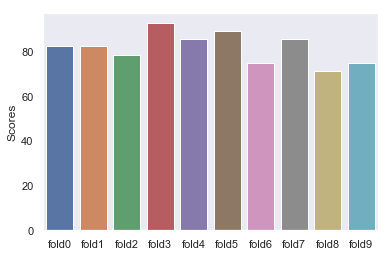

In [44]:
list_of_fold_names = ["fold" + str(i) for i in range(num_folds)]
print(list_of_fold_names)
scores = pd.DataFrame(knn_accuracy_model, columns = ['Scores'])
sns.set(style="dark", rc={"lines.linewidth": 2})
sns.barplot(x=list_of_fold_names, y = "Scores", data=scores)
plt.show()
sns.set()

In [45]:
knn_accuracy_summed = functools.reduce(lambda a,b: a + b, knn_accuracy_model)
print(knn_accuracy_summed)
knn_average_acc = knn_accuracy_summed/num_folds
print(knn_average_acc)

819.0886699507389
81.9088669950739


# Ensemble
## Bagging -> Do voting maybe
### AM I DOING IT WRONG? HOW TO PUT PREVIOUSLY TRAINED MODELS INTO ENSEMBLE?

In [46]:
from sklearn.ensemble import BaggingClassifier

In [47]:
intermediate_df = pd.DataFrame(intermediate_dict)
print(intermediate_df)

     SVM  LDA  KNN
0    0.0  0.0  0.0
1    1.0  1.0  1.0
2    1.0  1.0  1.0
3    0.0  0.0  0.0
4    0.0  0.0  0.0
5    0.0  0.0  0.0
6    0.0  1.0  0.0
7    0.0  0.0  1.0
8    1.0  1.0  1.0
9    1.0  1.0  1.0
10   1.0  0.0  1.0
11   0.0  0.0  0.0
12   1.0  1.0  1.0
13   0.0  0.0  0.0
14   0.0  0.0  0.0
15   0.0  0.0  0.0
16   0.0  0.0  0.0
17   0.0  0.0  0.0
18   0.0  0.0  0.0
19   0.0  0.0  0.0
20   0.0  0.0  0.0
21   0.0  0.0  0.0
22   0.0  0.0  0.0
23   1.0  1.0  1.0
24   1.0  1.0  1.0
25   0.0  0.0  0.0
26   0.0  0.0  0.0
27   0.0  0.0  0.0
28   0.0  0.0  0.0
29   1.0  1.0  1.0
..   ...  ...  ...
252  1.0  1.0  1.0
253  0.0  0.0  0.0
254  0.0  0.0  0.0
255  0.0  0.0  0.0
256  0.0  0.0  0.0
257  0.0  0.0  0.0
258  0.0  0.0  0.0
259  0.0  0.0  0.0
260  0.0  0.0  0.0
261  0.0  0.0  0.0
262  0.0  0.0  0.0
263  0.0  0.0  0.0
264  1.0  1.0  1.0
265  1.0  1.0  1.0
266  1.0  1.0  0.0
267  1.0  1.0  1.0
268  0.0  0.0  0.0
269  0.0  0.0  0.0
270  1.0  1.0  1.0
271  1.0  1.0  1.0
272  1.0  1.

In [48]:
print(df.num)

0      0.0
1      1.0
2      1.0
3      0.0
4      0.0
5      0.0
6      1.0
7      0.0
8      1.0
9      1.0
10     0.0
11     0.0
12     1.0
13     0.0
14     0.0
15     0.0
16     1.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     1.0
23     1.0
24     1.0
25     0.0
26     0.0
27     0.0
28     0.0
29     1.0
      ... 
252    0.0
253    0.0
254    0.0
255    0.0
256    0.0
257    0.0
258    0.0
259    1.0
260    0.0
261    1.0
262    0.0
263    0.0
264    1.0
265    1.0
266    1.0
267    1.0
268    1.0
269    0.0
270    1.0
271    0.0
272    1.0
273    0.0
274    1.0
275    0.0
276    0.0
277    0.0
278    1.0
279    0.0
280    1.0
281    0.0
Name: num, Length: 282, dtype: float64


In [49]:
# estimators = [('knn', knn_clf), ('svm', svm_clf), ('lda', lda_clf)]
# estimators = [knn_clf, lda_clf, svm_clf]
bagging_old_data_accuracy_model = []
X = df_to_use
y = df.num
bagging_clf = BaggingClassifier(base_estimator = SVC(gamma = 'auto'), n_estimators = 3, random_state = 0)
# bagging_clf.estimators = estimators
bagging_old_data_accuracy_model = k_fold_classifier_acc_tester(bagging_clf, {'NA':[]}, "NA", df_to_use, df.num)
print(bagging_old_data_accuracy_model)

[89.65517241379311, 86.20689655172413, 85.71428571428571, 96.42857142857143, 82.14285714285714, 85.71428571428571, 75.0, 71.42857142857143, 75.0, 82.14285714285714]


['fold0', 'fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9']


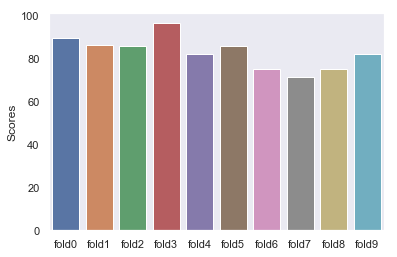

In [50]:
list_of_fold_names = ["fold" + str(i) for i in range(num_folds)]
print(list_of_fold_names)
scores = pd.DataFrame(bagging_old_data_accuracy_model, columns = ['Scores'])
sns.set(style="dark", rc={"lines.linewidth": 2})
sns.barplot(x=list_of_fold_names, y = "Scores", data=scores)
plt.show()
sns.set()

In [51]:
bagging_old_data_accuracy_summed = functools.reduce(lambda a,b: a + b, bagging_old_data_accuracy_model)
print(bagging_old_data_accuracy_summed)
bagging_old_data_average_acc = bagging_old_data_accuracy_summed/num_folds
print(bagging_old_data_average_acc)

829.4334975369458
82.94334975369458


In [52]:
# estimators = [('knn', knn_clf), ('svm', svm_clf), ('lda', lda_clf)]
# estimators = [knn_clf, lda_clf, svm_clf]
bagging_intermediate_data_accuracy_model = []
X = intermediate_df
y = df.num
bagging_clf2 = BaggingClassifier(base_estimator = SVC(gamma = 'auto'), n_estimators = 3, random_state = 0)
# bagging_clf.estimators = estimators
bagging_intermediate_data_accuracy_model = k_fold_classifier_acc_tester(bagging_clf2, {'NA':[]}, "NA", intermediate_df, df.num)
print(bagging_intermediate_data_accuracy_model)

[89.65517241379311, 86.20689655172413, 85.71428571428571, 96.42857142857143, 85.71428571428571, 82.14285714285714, 75.0, 82.14285714285714, 85.71428571428571, 78.57142857142857]


In [53]:
print(bagging_intermediate_data_accuracy_model)

[89.65517241379311, 86.20689655172413, 85.71428571428571, 96.42857142857143, 85.71428571428571, 82.14285714285714, 75.0, 82.14285714285714, 85.71428571428571, 78.57142857142857]


['fold0', 'fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9']


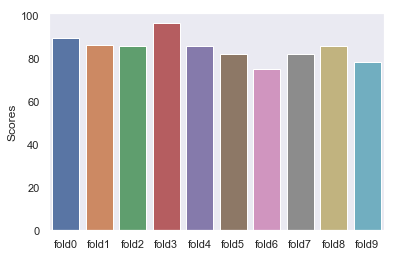

In [54]:
list_of_fold_names = ["fold" + str(i) for i in range(num_folds)]
print(list_of_fold_names)
scores = pd.DataFrame(bagging_intermediate_data_accuracy_model, columns = ['Scores'])
sns.set(style="dark", rc={"lines.linewidth": 2})
sns.barplot(x=list_of_fold_names, y = "Scores", data=scores)
plt.show()
sns.set()

In [55]:
bagging_intermediate_data_accuracy_summed = functools.reduce(lambda a,b: a + b, bagging_intermediate_data_accuracy_model)
print(bagging_intermediate_data_accuracy_summed)
bagging_intermediate_data_average_acc = bagging_intermediate_data_accuracy_summed/num_folds
print(bagging_intermediate_data_average_acc)

847.2906403940885
84.72906403940885


## VOTING Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [57]:
estimators = [('knn', knn_clf), ('svm', svm_clf), ('lda', lda_clf)]
voting_old_data_accuracy_model = []
X = df_to_use
y = df.num
voting_clf = VotingClassifier(estimators = estimators, voting='hard')
# bagging_clf.estimators = estimators
voting_old_data_accuracy_model = k_fold_classifier_acc_tester(voting_clf, {'NA':[]}, "NA", df_to_use, df.num)
print(voting_old_data_accuracy_model)

[86.20689655172413, 86.20689655172413, 85.71428571428571, 96.42857142857143, 82.14285714285714, 85.71428571428571, 71.42857142857143, 82.14285714285714, 82.14285714285714, 78.57142857142857]


['fold0', 'fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9']


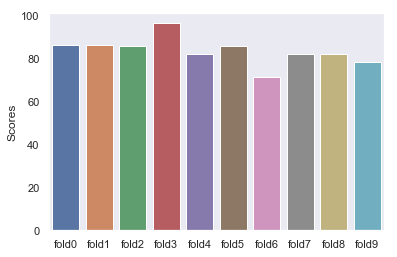

In [58]:
list_of_fold_names = ["fold" + str(i) for i in range(num_folds)]
print(list_of_fold_names)
scores = pd.DataFrame(voting_old_data_accuracy_model, columns = ['Scores'])
sns.set(style="dark", rc={"lines.linewidth": 2})
sns.barplot(x=list_of_fold_names, y = "Scores", data=scores)
plt.show()
sns.set()

In [59]:
voting_old_data_accuracy_summed = functools.reduce(lambda a,b: a + b, voting_old_data_accuracy_model)
print(voting_old_data_accuracy_summed)
voting_old_data_average_acc = voting_old_data_accuracy_summed/num_folds
print(voting_old_data_average_acc)

836.6995073891625
83.66995073891624


In [60]:
estimators = [('knn', knn_clf), ('svm', svm_clf), ('lda', lda_clf)]
voting_intermediate_data_accuracy_model = []
X = intermediate_df
y = df.num
voting_clf2 = VotingClassifier(estimators = estimators, voting='hard')
# bagging_clf.estimators = estimators
voting_intermediate_data_accuracy_model = k_fold_classifier_acc_tester(voting_clf2, {'NA':[]}, "NA", intermediate_df, df.num)
print(voting_intermediate_data_accuracy_model)

[93.10344827586206, 86.20689655172413, 85.71428571428571, 96.42857142857143, 85.71428571428571, 82.14285714285714, 75.0, 82.14285714285714, 82.14285714285714, 78.57142857142857]


['fold0', 'fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9']


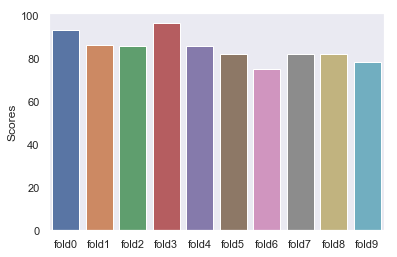

In [61]:
list_of_fold_names = ["fold" + str(i) for i in range(num_folds)]
print(list_of_fold_names)
scores = pd.DataFrame(voting_intermediate_data_accuracy_model, columns = ['Scores'])
sns.set(style="dark", rc={"lines.linewidth": 2})
sns.barplot(x=list_of_fold_names, y = "Scores", data=scores)
plt.show()
sns.set()

In [62]:
voting_intermediate_data_accuracy_summed = functools.reduce(lambda a,b: a + b, voting_intermediate_data_accuracy_model)
print(voting_intermediate_data_accuracy_summed)
voting_intermediate_data_average_acc = voting_intermediate_data_accuracy_summed/num_folds
print(voting_intermediate_data_average_acc)

847.1674876847289
84.7167487684729


# Final Table

In [63]:
accuracy_dict = {'SVM': [svm_average_acc], 'LDA': [lda_average_acc], 'KNN': [knn_average_acc], 'bagging_old':[bagging_old_data_average_acc], 'bagging_new':[bagging_intermediate_data_average_acc], 'voting_old':[voting_old_data_average_acc], 'voting_new':[voting_intermediate_data_average_acc]}

In [64]:
results_df = pd.DataFrame(accuracy_dict)
print(results_df)

        SVM        LDA        KNN  bagging_old  bagging_new  voting_old  \
0  82.96798  85.073892  81.908867     82.94335    84.729064   83.669951   

   voting_new  
0   84.716749  


# Testing accuracy

In [65]:
# fname = "C:\\Users\\jinhan laptop\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\updated_cleveland.data.xlsx"
# fname = "C:\\Users\\61491\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\updated_hungarian.xlsx"
# fname = "C:\\Users\\61491\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\updated_cleveland.data.xlsx"
fname = "C:\\Users\\jinhan laptop\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\updated_hungarian.xlsx"
dataframe = read_excel(fname, header = None, names=names)
print(dataframe)
print(dataframe.num)

       id  ccf  age  sex  painloc  painexer  relrest  pncaden  cp  trestbps  \
0    1254    0   40    1        1         0        0       -9   2       140   
1    1255    0   49    0        1         0        0       -9   3       160   
2    1256    0   37    1        1         0        0       -9   2       130   
3    1257    0   48    0        1         1        1       -9   4       138   
4    1258    0   54    1        1         0        1       -9   3       150   
5    1259    0   39    1        1         0        1       -9   3       120   
6    1260    0   45    0        0         1        0       -9   2       130   
7    1261    0   54    1        1         0        0       -9   2       110   
8    1262    0   37    1        1         1        1       -9   4       140   
9    1263    0   48    0        1         0        0       -9   2       120   
10   1264    0   37    0        1         0        1       -9   3       130   
11   1265    0   58    1        1         0        0

In [66]:
for i in range(dataframe.shape[0]): # for each row
    for column in dataframe.columns:
        if dataframe.at[i, column] == -9:
            dataframe.loc[i, column] = np.nan
print(dataframe)

       id  ccf  age  sex  painloc  painexer  relrest  pncaden  cp  trestbps  \
0    1254    0   40    1        1         0        0      NaN   2     140.0   
1    1255    0   49    0        1         0        0      NaN   3     160.0   
2    1256    0   37    1        1         0        0      NaN   2     130.0   
3    1257    0   48    0        1         1        1      NaN   4     138.0   
4    1258    0   54    1        1         0        1      NaN   3     150.0   
5    1259    0   39    1        1         0        1      NaN   3     120.0   
6    1260    0   45    0        0         1        0      NaN   2     130.0   
7    1261    0   54    1        1         0        0      NaN   2     110.0   
8    1262    0   37    1        1         1        1      NaN   4     140.0   
9    1263    0   48    0        1         0        0      NaN   2     120.0   
10   1264    0   37    0        1         0        1      NaN   3     130.0   
11   1265    0   58    1        1         0        0

In [67]:
df = dataframe.fillna(dataframe.mean())
print(df)
print(df.num) # target

       id  ccf  age  sex  painloc  painexer  relrest  pncaden  cp    trestbps  \
0    1254    0   40    1        1         0        0      NaN   2  140.000000   
1    1255    0   49    0        1         0        0      NaN   3  160.000000   
2    1256    0   37    1        1         0        0      NaN   2  130.000000   
3    1257    0   48    0        1         1        1      NaN   4  138.000000   
4    1258    0   54    1        1         0        1      NaN   3  150.000000   
5    1259    0   39    1        1         0        1      NaN   3  120.000000   
6    1260    0   45    0        0         1        0      NaN   2  130.000000   
7    1261    0   54    1        1         0        0      NaN   2  110.000000   
8    1262    0   37    1        1         1        1      NaN   4  140.000000   
9    1263    0   48    0        1         0        0      NaN   2  120.000000   
10   1264    0   37    0        1         0        1      NaN   3  130.000000   
11   1265    0   58    1    

In [68]:
# print(df.isna())
# print(df.num.isna())
# print
df = df.dropna(axis=1,how='all')
print(df)
print(df.num)

       id  ccf  age  sex  painloc  painexer  relrest  cp    trestbps  htn  \
0    1254    0   40    1        1         0        0   2  140.000000  0.0   
1    1255    0   49    0        1         0        0   3  160.000000  1.0   
2    1256    0   37    1        1         0        0   2  130.000000  0.0   
3    1257    0   48    0        1         1        1   4  138.000000  0.0   
4    1258    0   54    1        1         0        1   3  150.000000  0.0   
5    1259    0   39    1        1         0        1   3  120.000000  0.0   
6    1260    0   45    0        0         1        0   2  130.000000  0.0   
7    1261    0   54    1        1         0        0   2  110.000000  0.0   
8    1262    0   37    1        1         1        1   4  140.000000  1.0   
9    1263    0   48    0        1         0        0   2  120.000000  0.0   
10   1264    0   37    0        1         0        1   3  130.000000  0.0   
11   1265    0   58    1        1         0        0   2  136.000000  1.0   

In [69]:
print(df.dummy)
print(df.trestbps)
# df = df.drop(['dummy'], axis=1)
df = df.drop(['dummy', 'id', 'ekgyr', 'ekgday', 'ekgmo', 'ccf', 'cmo', 'cday', 'cyr'], axis=1)
print(df)

0      140.000000
1      160.000000
2      130.000000
3      138.000000
4      150.000000
5      120.000000
6      130.000000
7      110.000000
8      140.000000
9      120.000000
10     130.000000
11     136.000000
12     120.000000
13     140.000000
14     115.000000
15     120.000000
16     110.000000
17     120.000000
18     100.000000
19     120.000000
20     100.000000
21     120.000000
22     124.000000
23     150.000000
24     130.000000
25     130.000000
26     124.000000
27     120.000000
28     113.000000
29     125.000000
          ...    
264    130.000000
265    140.000000
266    160.000000
267    130.000000
268     98.000000
269    130.000000
270    130.000000
271    120.000000
272    105.000000
273    140.000000
274    120.000000
275    180.000000
276    180.000000
277    135.000000
278    170.000000
279    180.000000
280    130.000000
281    120.000000
282    150.000000
283    130.000000
284    110.000000
285    140.000000
286    110.000000
287    140.000000
288    120

In [70]:
myGenderColumn = df["sex"]
myExangColumn = df["exang"]
myFBSColumn = df["fbs"]
print(myGenderColumn)

0      1
1      0
2      1
3      0
4      1
5      1
6      0
7      1
8      1
9      0
10     0
11     1
12     1
13     1
14     0
15     0
16     1
17     0
18     1
19     1
20     0
21     1
22     0
23     1
24     1
25     1
26     1
27     1
28     0
29     1
      ..
264    1
265    1
266    1
267    1
268    1
269    1
270    0
271    1
272    0
273    1
274    1
275    0
276    1
277    1
278    1
279    0
280    0
281    1
282    1
283    0
284    0
285    1
286    0
287    1
288    1
289    0
290    1
291    1
292    0
293    1
Name: sex, Length: 294, dtype: int64


In [71]:

# normalize data
x = df.values #returns a numpy array
# columns = df.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = df.columns)
print(df)
print(df.num)


          age  sex  painloc  painexer  relrest        cp  trestbps  htn  \
0    0.315789  1.0      1.0       0.0      0.0  0.333333  0.444444  0.0   
1    0.552632  0.0      1.0       0.0      0.0  0.666667  0.629630  1.0   
2    0.236842  1.0      1.0       0.0      0.0  0.333333  0.351852  0.0   
3    0.526316  0.0      1.0       1.0      1.0  1.000000  0.425926  0.0   
4    0.684211  1.0      1.0       0.0      1.0  0.666667  0.537037  0.0   
5    0.289474  1.0      1.0       0.0      1.0  0.666667  0.259259  0.0   
6    0.447368  0.0      0.0       1.0      0.0  0.333333  0.351852  0.0   
7    0.684211  1.0      1.0       0.0      0.0  0.333333  0.166667  0.0   
8    0.236842  1.0      1.0       1.0      1.0  1.000000  0.444444  1.0   
9    0.526316  0.0      1.0       0.0      0.0  0.333333  0.259259  0.0   
10   0.236842  0.0      1.0       0.0      1.0  0.666667  0.351852  0.0   
11   0.789474  1.0      1.0       0.0      0.0  0.333333  0.407407  1.0   
12   0.289474  1.0      1

[294 rows x 58 columns]
0      0.00
1      0.25
2      0.00
3      0.75
4      0.00
5      0.00
6      0.00
7      0.00
8      0.25
9      0.00
10     0.00
11     0.75
12     0.00
13     0.75
14     0.00
15     0.00
16     0.25
17     0.00
18     0.25
19     0.25
20     0.00
21     0.00
22     0.00
23     0.75
24     0.00
25     0.00
26     0.00
27     0.00
28     0.00
29     0.00
       ... 
264    0.75
265    0.25
266    0.00
267    0.75
268    0.00
269    0.50
270    0.00
271    0.00
272    0.00
273    0.25
274    0.00
275    0.00
276    0.00
277    0.75
278    0.50
279    0.00
280    0.00
281    0.00
282    1.00
283    0.00
284    0.00
285    0.00
286    0.00
287    0.00
288    0.00
289    0.00
290    0.00
291    0.00
292    0.00
293    0.00
Name: num, Length: 294, dtype: float64


In [72]:
# df_vals = dataframe.values
df_no_target = df[df.columns.difference(["num"])]
print(df_no_target) # setting target and non target
df_vals = df_no_target.values
print(df.num.values)
# target_vals = df.num.values

          age    ca    cathef      chol  cigs        cp    cxmain      diag  \
0    0.315789  0.25  0.746867  0.393822   0.0  0.333333  0.830508  0.722222   
1    0.552632  0.25  0.746867  0.183398   0.0  0.666667  0.830508  0.722222   
2    0.236842  0.25  0.746867  0.382239   0.0  0.333333  0.830508  0.722222   
3    0.526316  0.25  0.746867  0.249035   0.0  1.000000  1.000000  0.722222   
4    0.684211  0.25  0.746867  0.320171   0.0  0.666667  0.000000  0.722222   
5    0.289474  0.25  0.746867  0.490347   0.0  0.666667  0.830508  0.722222   
6    0.447368  0.25  0.746867  0.293436   0.0  0.333333  0.830508  0.722222   
7    0.684211  0.25  0.746867  0.237452   0.0  0.333333  0.830508  0.722222   
8    0.236842  0.25  0.746867  0.235521   0.0  1.000000  0.830508  0.722222   
9    0.526316  0.25  0.746867  0.384170   0.0  0.333333  0.000000  0.722222   
10   0.236842  0.25  0.746867  0.243243   0.0  0.666667  0.830508  0.722222   
11   0.789474  0.25  0.746867  0.152510   0.0  0.333

In [73]:
#print(df.shape[0])
# for i in range(len(df.shape[0])):
# print(df.num)
# print(df)
df.loc[df["num"] > 0, "num"] = 1 # CHANGE 1,2,3 to 1, make it a classification problem
print(df.num) 
target_vals = df.num.values

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
5      0.0
6      0.0
7      0.0
8      1.0
9      0.0
10     0.0
11     1.0
12     0.0
13     1.0
14     0.0
15     0.0
16     1.0
17     0.0
18     1.0
19     1.0
20     0.0
21     0.0
22     0.0
23     1.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
264    1.0
265    1.0
266    0.0
267    1.0
268    0.0
269    1.0
270    0.0
271    0.0
272    0.0
273    1.0
274    0.0
275    0.0
276    0.0
277    1.0
278    1.0
279    0.0
280    0.0
281    0.0
282    1.0
283    0.0
284    0.0
285    0.0
286    0.0
287    0.0
288    0.0
289    0.0
290    0.0
291    0.0
292    0.0
293    0.0
Name: num, Length: 294, dtype: float64


In [74]:
print(features_selected)

['age', 'age', 'ca', 'ca', 'ca', 'ca', 'ca', 'chol', 'chol', 'cp', 'cp', 'cp', 'cp', 'cp', 'exang', 'exang', 'exang', 'exang', 'exang', 'famhist', 'lvx3', 'lvx3', 'lvx4', 'lvx4', 'lvx4', 'lvx4', 'met', 'met', 'met', 'met', 'oldpeak', 'oldpeak', 'oldpeak', 'oldpeak', 'oldpeak', 'restecg', 'restecg', 'restecg', 'sex', 'sex', 'sex', 'sex', 'sex', 'slope', 'slope', 'slope', 'slope', 'slope', 'thal', 'thal', 'thal', 'thal', 'thal', 'thalach', 'thalach', 'thalach', 'thalach', 'thalach', 'thaldur', 'thaldur', 'thaldur', 'thaldur', 'thaldur', 'thaltime', 'years']


In [75]:
df_to_use2 = df[features_to_use]
print(df_to_use2)

       ca        cp     exang  oldpeak  sex     slope      thal   thalach  \
0    0.25  0.333333  0.000000     0.00  1.0  0.447115  0.660714  0.833333   
1    0.25  0.666667  0.000000     0.20  0.0  0.500000  0.660714  0.685185   
2    0.25  0.333333  0.000000     0.00  1.0  0.447115  0.660714  0.148148   
3    0.25  1.000000  1.000000     0.30  0.0  0.500000  0.660714  0.240741   
4    0.25  0.666667  0.000000     0.00  1.0  0.447115  0.660714  0.370370   
5    0.25  0.666667  0.000000     0.00  1.0  0.447115  0.660714  0.814815   
6    0.25  0.333333  0.000000     0.00  0.0  0.447115  0.660714  0.814815   
7    0.25  0.333333  0.000000     0.00  1.0  0.447115  0.660714  0.555556   
8    0.25  1.000000  1.000000     0.30  1.0  0.500000  0.660714  0.444444   
9    0.25  0.333333  0.000000     0.00  0.0  0.447115  0.660714  0.351852   
10   0.25  0.666667  0.000000     0.00  0.0  0.447115  0.660714  0.555556   
11   0.25  0.333333  1.000000     0.40  1.0  0.500000  0.660714  0.157407   

In [76]:
svm_clf_score = svm_clf.score(df_to_use2, df.num) * 100
print(svm_clf_score)

84.01360544217688


In [77]:
lda_clf_score = lda_clf.score(df_to_use2, df.num) * 100
print(lda_clf_score)

81.29251700680273


In [78]:
knn_clf_score = knn_clf.score(df_to_use2, df.num) * 100
print(knn_clf_score)

79.93197278911565


In [79]:
bagging_clf_score = bagging_clf.score(df_to_use2, df.num) * 100
print(bagging_clf_score)

79.93197278911565


In [80]:
voting_clf_score = voting_clf.score(df_to_use2, df.num) * 100
print(voting_clf_score)

82.6530612244898


In [81]:
svm_clf_predictions = svm_clf.predict(df_to_use2)
print(svm_clf_predictions)

[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1.]


In [82]:
lda_clf_predictions = lda_clf.predict(df_to_use2)
print(lda_clf_predictions)

[0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [83]:
knn_clf_predictions = knn_clf.predict(df_to_use2)
print(knn_clf_predictions)

[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1.]


In [84]:
intermediate_dict2 = {'SVM': svm_clf_predictions, 'LDA': lda_clf_predictions, 'KNN': knn_clf_predictions}
print(intermediate_dict2)

{'SVM': array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0.

In [85]:
intermediate_df2 = pd.DataFrame(intermediate_dict2)
print(intermediate_df2)

     SVM  LDA  KNN
0    0.0  0.0  0.0
1    0.0  0.0  0.0
2    0.0  1.0  0.0
3    1.0  1.0  1.0
4    0.0  0.0  0.0
5    0.0  0.0  0.0
6    0.0  0.0  0.0
7    0.0  0.0  0.0
8    1.0  1.0  1.0
9    0.0  0.0  0.0
10   0.0  0.0  0.0
11   1.0  1.0  1.0
12   0.0  0.0  0.0
13   1.0  1.0  1.0
14   0.0  0.0  0.0
15   0.0  0.0  0.0
16   0.0  0.0  0.0
17   0.0  0.0  0.0
18   1.0  1.0  1.0
19   0.0  0.0  1.0
20   0.0  0.0  0.0
21   0.0  0.0  0.0
22   0.0  0.0  0.0
23   1.0  1.0  1.0
24   0.0  0.0  1.0
25   0.0  0.0  0.0
26   1.0  1.0  1.0
27   0.0  0.0  0.0
28   0.0  0.0  0.0
29   0.0  0.0  0.0
..   ...  ...  ...
264  1.0  1.0  1.0
265  1.0  1.0  1.0
266  0.0  0.0  0.0
267  1.0  1.0  1.0
268  0.0  0.0  0.0
269  1.0  1.0  1.0
270  0.0  0.0  0.0
271  1.0  1.0  1.0
272  0.0  0.0  0.0
273  1.0  1.0  1.0
274  1.0  1.0  1.0
275  0.0  0.0  0.0
276  1.0  1.0  1.0
277  0.0  1.0  1.0
278  1.0  1.0  1.0
279  1.0  1.0  1.0
280  0.0  0.0  0.0
281  1.0  1.0  1.0
282  1.0  1.0  1.0
283  0.0  0.0  1.0
284  0.0  0.

In [86]:
bagging_clf_score2 = bagging_clf2.score(intermediate_df2, df.num) * 100
print(bagging_clf_score2)

81.29251700680273


In [87]:
voting_clf_score2 = voting_clf2.score(intermediate_df2, df.num) * 100
print(voting_clf_score2)

81.29251700680273


### Proving below voting_clf and bagging_clf are 2 different classifiers below, cause they had same score

In [88]:
print(voting_clf2)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gam...None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)


In [89]:
print(bagging_clf2) 

BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=3, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False)


# Show all accuracy

In [90]:
print(accuracy_dict)

{'SVM': [82.96798029556649], 'LDA': [85.07389162561574], 'KNN': [81.9088669950739], 'bagging_old': [82.94334975369458], 'bagging_new': [84.72906403940885], 'voting_old': [83.66995073891624], 'voting_new': [84.7167487684729]}


In [91]:
accuracy_dict_other_dataset = {'SVM': [svm_clf_score], 'LDA': [lda_clf_score], 'KNN': [knn_clf_score], 'bagging_old':[bagging_clf_score], 'bagging_new':[bagging_clf_score2], 'voting_old':[voting_clf_score], 'voting_new':[voting_clf_score2]}

In [92]:
results_df2 = pd.DataFrame(accuracy_dict_other_dataset)
print(results_df2)

         SVM        LDA        KNN  bagging_old  bagging_new  voting_old  \
0  84.013605  81.292517  79.931973    79.931973    81.292517   82.653061   

   voting_new  
0   81.292517  


In [93]:
accuracy_dict2 = {'SVM': [svm_average_acc], 'SVM_other': [svm_clf_score], 'LDA': [lda_average_acc], 'LDA_other': [lda_clf_score], 'KNN': [knn_average_acc], 'KNN_other': [knn_clf_score], 'bagging_old':[bagging_old_data_average_acc], 'bagging_old_other':[bagging_clf_score], 'bagging_new':[bagging_intermediate_data_average_acc], 'bagging_new_other':[bagging_clf_score2], 'voting_old':[voting_old_data_average_acc], 'voting_old_other':[voting_clf_score], 'voting_new':[voting_intermediate_data_average_acc], 'voting_new_other':[voting_clf_score2]}

In [94]:
results_df3 = pd.DataFrame(accuracy_dict2)
print(results_df3)

        SVM  SVM_other        LDA  LDA_other        KNN  KNN_other  \
0  82.96798  84.013605  85.073892  81.292517  81.908867  79.931973   

   bagging_old  bagging_old_other  bagging_new  bagging_new_other  voting_old  \
0     82.94335          79.931973    84.729064          81.292517   83.669951   

   voting_old_other  voting_new  voting_new_other  
0         82.653061   84.716749         81.292517  


# All results

## Result from testing on k-fold validation of train+test set

In [95]:
print(results_df)

        SVM        LDA        KNN  bagging_old  bagging_new  voting_old  \
0  82.96798  85.073892  81.908867     82.94335    84.729064   83.669951   

   voting_new  
0   84.716749  


## Result from testing on another dataset

In [96]:
print(results_df2)

         SVM        LDA        KNN  bagging_old  bagging_new  voting_old  \
0  84.013605  81.292517  79.931973    79.931973    81.292517   82.653061   

   voting_new  
0   81.292517  


## Result of everything combined, side by side comparison

In [97]:
print(results_df3)

        SVM  SVM_other        LDA  LDA_other        KNN  KNN_other  \
0  82.96798  84.013605  85.073892  81.292517  81.908867  79.931973   

   bagging_old  bagging_old_other  bagging_new  bagging_new_other  voting_old  \
0     82.94335          79.931973    84.729064          81.292517   83.669951   

   voting_old_other  voting_new  voting_new_other  
0         82.653061   84.716749         81.292517  


# Kinda the end

## Let's test the PRECISION and RECALL of model on the other dataset

In [98]:
print(1 == 1.0)

True


In [99]:
print(intermediate_df2.shape)

(294, 3)


In [100]:
print(intermediate_df2)

     SVM  LDA  KNN
0    0.0  0.0  0.0
1    0.0  0.0  0.0
2    0.0  1.0  0.0
3    1.0  1.0  1.0
4    0.0  0.0  0.0
5    0.0  0.0  0.0
6    0.0  0.0  0.0
7    0.0  0.0  0.0
8    1.0  1.0  1.0
9    0.0  0.0  0.0
10   0.0  0.0  0.0
11   1.0  1.0  1.0
12   0.0  0.0  0.0
13   1.0  1.0  1.0
14   0.0  0.0  0.0
15   0.0  0.0  0.0
16   0.0  0.0  0.0
17   0.0  0.0  0.0
18   1.0  1.0  1.0
19   0.0  0.0  1.0
20   0.0  0.0  0.0
21   0.0  0.0  0.0
22   0.0  0.0  0.0
23   1.0  1.0  1.0
24   0.0  0.0  1.0
25   0.0  0.0  0.0
26   1.0  1.0  1.0
27   0.0  0.0  0.0
28   0.0  0.0  0.0
29   0.0  0.0  0.0
..   ...  ...  ...
264  1.0  1.0  1.0
265  1.0  1.0  1.0
266  0.0  0.0  0.0
267  1.0  1.0  1.0
268  0.0  0.0  0.0
269  1.0  1.0  1.0
270  0.0  0.0  0.0
271  1.0  1.0  1.0
272  0.0  0.0  0.0
273  1.0  1.0  1.0
274  1.0  1.0  1.0
275  0.0  0.0  0.0
276  1.0  1.0  1.0
277  0.0  1.0  1.0
278  1.0  1.0  1.0
279  1.0  1.0  1.0
280  0.0  0.0  0.0
281  1.0  1.0  1.0
282  1.0  1.0  1.0
283  0.0  0.0  1.0
284  0.0  0.

In [101]:
intermediate_dict3 = intermediate_dict2

In [102]:
intermediate_dict3['bagging_old'] = bagging_clf.predict(df_to_use2)

In [103]:
intermediate_dict3['bagging_new'] = bagging_clf2.predict(intermediate_df2)

In [127]:
print(bagging_clf2)

BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=3, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False)


In [104]:
intermediate_dict3['voting_old'] = voting_clf.predict(df_to_use2)

In [105]:
intermediate_dict3['voting_new'] = voting_clf2.predict(intermediate_df2)

In [128]:
print(voting_clf2)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gam...None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)


In [125]:
print(intermediate_dict3['voting_new'] == intermediate_dict3['bagging_new'])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [126]:
for x in intermediate_dict3['voting_new'] == intermediate_dict3['bagging_new']:
    if x == False:
        print("False")
        break

In [106]:
intermediate_df3 = pd.DataFrame(intermediate_dict3)
print(intermediate_df3)

     SVM  LDA  KNN  bagging_old  bagging_new  voting_old  voting_new
0    0.0  0.0  0.0          0.0          0.0         0.0         0.0
1    0.0  0.0  0.0          0.0          0.0         0.0         0.0
2    0.0  1.0  0.0          0.0          1.0         0.0         1.0
3    1.0  1.0  1.0          1.0          1.0         1.0         1.0
4    0.0  0.0  0.0          1.0          0.0         0.0         0.0
5    0.0  0.0  0.0          0.0          0.0         0.0         0.0
6    0.0  0.0  0.0          0.0          0.0         0.0         0.0
7    0.0  0.0  0.0          0.0          0.0         0.0         0.0
8    1.0  1.0  1.0          1.0          1.0         1.0         1.0
9    0.0  0.0  0.0          0.0          0.0         0.0         0.0
10   0.0  0.0  0.0          0.0          0.0         0.0         0.0
11   1.0  1.0  1.0          1.0          1.0         1.0         1.0
12   0.0  0.0  0.0          0.0          0.0         0.0         0.0
13   1.0  1.0  1.0          1.0   

In [107]:
SVM_true_posi_num = 0
SVM_false_posi_num = 0
SVM_false_negatives = 0

LDA_true_posi_num = 0
LDA_false_posi_num = 0
LDA_false_negatives = 0

KNN_true_posi_num = 0
KNN_false_posi_num = 0
KNN_false_negatives = 0

bagging_old_true_posi_num = 0
bagging_old_false_posi_num = 0
bagging_old_false_negatives = 0

bagging_new_true_posi_num = 0
bagging_new_false_posi_num = 0
bagging_new_false_negatives = 0

voting_old_true_posi_num = 0
voting_old_false_posi_num = 0
voting_old_false_negatives = 0

voting_new_true_posi_num = 0
voting_new_false_posi_num = 0
voting_new_false_negatives = 0

for i in range(intermediate_df3.shape[0]): 
    if intermediate_df3.iloc[i]['SVM'] == 1:
        if intermediate_df3.iloc[i]['SVM'] == df.iloc[i]['num']:    # True positive
            SVM_true_posi_num += 1
        else: # false positie
            SVM_false_posi_num += 1
    else: # if == 0
        if intermediate_df3.iloc[i]['SVM'] == df.iloc[i]['num']:    # True positive
            pass
        else: # false negative
            SVM_false_negatives += 1
    
    if intermediate_df3.iloc[i]['LDA'] == 1:
        if intermediate_df3.iloc[i]['LDA'] == df.iloc[i]['num']:    # True positive
            LDA_true_posi_num += 1
        else: # false positie
            LDA_false_posi_num += 1
    else: # if == 0
        if intermediate_df3.iloc[i]['LDA'] == df.iloc[i]['num']:    # True positive
            pass
        else: # false negative
            LDA_false_negatives += 1
    if intermediate_df3.iloc[i]['KNN'] == 1:
        if intermediate_df3.iloc[i]['KNN'] == df.iloc[i]['num']:    # True positive
            KNN_true_posi_num += 1
        else: # false positie
            KNN_false_posi_num += 1
    else: # if == 0
        if intermediate_df3.iloc[i]['KNN'] == df.iloc[i]['num']:    # True positive
            pass
        else: # false negative
            KNN_false_negatives += 1
            
            
    if intermediate_df3.iloc[i]['bagging_old'] == 1:
        if intermediate_df3.iloc[i]['bagging_old'] == df.iloc[i]['num']:    # True positive
            bagging_old_true_posi_num += 1
        else: # false positie
            bagging_old_false_posi_num += 1
    else: # if == 0
        if intermediate_df3.iloc[i]['bagging_old'] == df.iloc[i]['num']:    # True positive
            pass
        else: # false negative
            bagging_old_false_negatives += 1
    if intermediate_df3.iloc[i]['bagging_new'] == 1:
        if intermediate_df3.iloc[i]['bagging_new'] == df.iloc[i]['num']:    # True positive
            bagging_new_true_posi_num += 1
        else: # false positie
            bagging_new_false_posi_num += 1
    else: # if == 0
        if intermediate_df3.iloc[i]['bagging_new'] == df.iloc[i]['num']:    # True positive
            pass
        else: # false negative
            bagging_new_false_negatives += 1
    if intermediate_df3.iloc[i]['voting_old'] == 1:
        if intermediate_df3.iloc[i]['voting_old'] == df.iloc[i]['num']:    # True positive
            voting_old_true_posi_num += 1
        else: # false positie
            voting_old_false_posi_num += 1
    else: # if == 0
        if intermediate_df3.iloc[i]['voting_old'] == df.iloc[i]['num']:    # True positive
            pass
        else: # false negative
            voting_old_false_negatives += 1
    if intermediate_df3.iloc[i]['voting_new'] == 1:
        if intermediate_df3.iloc[i]['voting_new'] == df.iloc[i]['num']:    # True positive
            voting_new_true_posi_num += 1
        else: # false positie
            voting_new_false_posi_num += 1
    else: # if == 0
        if intermediate_df3.iloc[i]['voting_new'] == df.iloc[i]['num']:    # True positive
            pass
        else: # false negative
            voting_new_false_negatives += 1

### Precision = True Positives/ (True Positives + False Positives)

In [108]:
SVM_precision = SVM_true_posi_num/ (SVM_true_posi_num + SVM_false_posi_num)
print(SVM_precision)

0.7478991596638656


In [109]:
LDA_precision = LDA_true_posi_num/ (LDA_true_posi_num + LDA_false_posi_num)
print(LDA_precision)

0.6976744186046512


In [110]:
KNN_precision = KNN_true_posi_num/ (KNN_true_posi_num + KNN_false_posi_num)
print(KNN_precision)

0.6766917293233082


In [111]:
bagging_old_precision = bagging_old_true_posi_num/ (bagging_old_true_posi_num + bagging_old_false_posi_num)
print(bagging_old_precision)

0.6643356643356644


In [112]:
bagging_new_precision = bagging_new_true_posi_num/ (bagging_new_true_posi_num + bagging_new_false_posi_num)
print(bagging_new_precision)

0.6976744186046512


In [113]:
voting_old_precision = voting_old_true_posi_num/ (voting_old_true_posi_num + voting_old_false_posi_num)
print(voting_old_precision)

0.7165354330708661


In [114]:
voting_new_precision = voting_new_true_posi_num/ (voting_new_true_posi_num + voting_new_false_posi_num)
print(voting_new_precision)

0.6976744186046512


## Recall = TruePositives / (TruePositives + FalseNegatives)

In [115]:
SVM_recall = SVM_true_posi_num/ (SVM_true_posi_num + SVM_false_negatives)
print(SVM_recall)

0.839622641509434


In [116]:
LDA_recall = LDA_true_posi_num/ (LDA_true_posi_num + LDA_false_negatives)
print(LDA_recall)

0.8490566037735849


In [117]:
KNN_recall = KNN_true_posi_num/ (KNN_true_posi_num + KNN_false_negatives)
print(KNN_recall)

0.8490566037735849


In [118]:
bagging_old_recall = bagging_old_true_posi_num/ (bagging_old_true_posi_num + bagging_old_false_negatives)
print(bagging_old_recall)

0.8962264150943396


In [119]:
bagging_new_recall = bagging_new_true_posi_num/ (bagging_new_true_posi_num + bagging_new_false_negatives)
print(bagging_new_recall)

0.8490566037735849


In [120]:
voting_old_recall = voting_old_true_posi_num/ (voting_old_true_posi_num + voting_old_false_negatives)
print(voting_old_recall)

0.8584905660377359


In [122]:
voting_new_recall = voting_new_true_posi_num/ (voting_new_true_posi_num + voting_new_false_negatives)
print(voting_new_recall)

0.8490566037735849


## Showing accuracy

In [123]:
print(results_df3)

        SVM  SVM_other        LDA  LDA_other        KNN  KNN_other  \
0  82.96798  84.013605  85.073892  81.292517  81.908867  79.931973   

   bagging_old  bagging_old_other  bagging_new  bagging_new_other  voting_old  \
0     82.94335          79.931973    84.729064          81.292517   83.669951   

   voting_old_other  voting_new  voting_new_other  
0         82.653061   84.716749         81.292517  


### Sanity check cause same results obtained for some stuff

In [129]:
print(KNN_true_posi_num)
print(KNN_false_posi_num)
print(KNN_false_negatives)

90
43
16


In [130]:
print(bagging_new_true_posi_num)
print(bagging_new_false_posi_num)
print(bagging_new_false_negatives)

90
39
16


In [131]:
print(voting_new_true_posi_num)
print(voting_new_false_posi_num)
print(voting_new_false_negatives)

90
39
16


In [ ]:
x = that

In [ ]:
# 1. #3 (age)
2. #4 (sex) -
3. #9 (cp) -
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach) -
9. #38 (exang) -
10. #40 (oldpeak) -
11. #41 (slope) -
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

In [ ]:
# # cleveland
# [('cp', 5), ('exang', 5), ('oldpeak', 5), ('painexer', 5), ('relrest', 5), ('laddist', 4), ('ladprox', 4), ('lvx4', 4), ('slope', 4), ('thalach', 4), ('lvf', 3), ('nitr', 3), ('sex', 3), ('cxmain', 2), ('om1', 2), ('rcadist', 2), ('rcaprox', 2), ('thalsev', 2), ('thaltime', 2), ('fbs', 1), ('lvx3', 1), ('pro', 1), ('prop', 1)]

In [ ]:
# [('cp', 5), ('exang', 5), ('oldpeak', 5), ('painexer', 5), ('relrest', 5), ('laddist', 4), ('ladprox', 4), ('lvx4', 4), ('slope', 4), ('thalach', 4), ('lvf', 3), ('nitr', 3), ('sex', 3), ('cxmain', 2), ('om1', 2), ('rcadist', 2), ('rcaprox', 2), ('thalsev', 2), ('thaltime', 2), ('fbs', 1), ('lvx3', 1), ('pro', 1), ('prop', 1)]
# #hungarian
print(df.sex)

## Doing the same for Z-AlizadehSani dataset

In [ ]:
fname = "C:\\Users\\jinhan laptop\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\Z-Alizadeh_sani_dataset.xlsx"
# fname = "C:\\Users\\61491\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\updated_hungarian.xlsx"
# fname = "C:\\Users\\61491\\Desktop\\FIT\\FIT3162\\Assignment\\Data_Files\\updated_cleveland.data.xlsx"
dataframe = read_excel(fname, header = 0)
print(dataframe)

In [ ]:
for i in range(dataframe.shape[0]): # for each row
    for column in dataframe.columns:
        if dataframe.at[i, column] == -9:
            dataframe.loc[i, column] = np.nan
print(dataframe)

In [ ]:
df = dataframe.fillna(dataframe.mean())
print(df)
print(df.Cath) # target

In [ ]:
df.loc[df["Sex"] == "Male", "Sex"] = 1
df.loc[df["Sex"] == "Fmale", "Sex"] = 0

In [ ]:
df.loc[df["Cath"] == "Cad", "Cath"] = 1
df.loc[df["Cath"] == "Normal", "Cath"] = 0

In [ ]:
df = df.drop(['VHD'], axis=1)

In [ ]:
print(df)

In [ ]:
def variance_threshold_selector(data):
    selector = VarianceThreshold(0.225) # 0.225 chosen to remove some fields that do not have much variance.
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]] # code from stackoverflow
# x = df.values
df = variance_threshold_selector(df)
# varianceThresholdSelected = sel.fit_transform(x)
# df = pd.DataFrame(varianceThresholdSelected, columns = df.columns)
print(df)

## Maybe Some other time, do Z-AlizadehSani.